In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CFAD
Faire tourner le script `stats_for_CFADs.py`

**La conversion en pickle est bien mieux que csv car elle permet le stockage des valeurs pol sous forme de array dans le dataframe**

In [56]:
data_path = "/home/cnrm_other/ge/mrmp/augros/WKD/CORSE/"
#df = pd.read_pickle(f'{final_data}stats_cell_core.pkl')
#df = pd.read_pickle(f'{final_data}stats_cell_envelop.pkl')
#df = pd.read_pickle(f'{final_data}stats_ZDR_columns.pkl')
df = pd.read_pickle(f'{data_path}stats_Zh.pkl')
df

,altitude,varname,dataType,Q5,Q25,Q50,Q75,Q95
0,0,Zh,Arome_ICE3,3.812265,15.714110,26.381033,34.424892,42.660191
1,500,Zh,Arome_ICE3,3.475648,14.805388,25.841341,34.746984,43.083604
2,1000,Zh,Arome_ICE3,3.500866,14.774945,25.692104,34.986061,43.210061
3,1500,Zh,Arome_ICE3,3.575427,14.687407,25.409227,34.963732,43.486061
4,2000,Zh,Arome_ICE3,3.888595,15.251649,25.615467,35.207497,43.863414
...,...,...,...,...,...,...,...,...
115,12500,Zh,MesoNH_LIMH,NaN,NaN,NaN,NaN,NaN
116,13000,Zh,MesoNH_LIMH,NaN,NaN,NaN,NaN,NaN
117,13500,Zh,MesoNH_LIMH,NaN,NaN,NaN,NaN,NaN
118,14000,Zh,MesoNH_LIMH,NaN,NaN,NaN,NaN,NaN


In [57]:
def plot_CFAD(ax,df,var,dataType,color='tab:blue',add_extreme=False,add_Q25_Q75_interval=True):
    subdf = df[(df.varname==var)&(df.dataType==dataType)]
    alti = subdf.altitude
    #plot, = ax.plot(subdf.Q50,alti,label=f'{var} Q50',c=color)
    plot, = ax.plot(subdf.Q50,alti,label=f'{dataType}',c=color)
    if add_Q25_Q75_interval :
        #plot = ax.fill_betweenx(alti,subdf.Q25,subdf.Q75,alpha=0.2,label='[Q25-Q75]',color=color)
        ax.plot(subdf.Q25,alti,c=color,ls=':',lw=1.5) # commenter cette ligne pour ne pas l'afficher
        plot = ax.plot(subdf.Q75,alti,c=color,ls=':',lw=1.5)
    if add_extreme :
        ax.plot(subdf.Q5,alti,c=color,ls='--',lw=1) # commenter cette ligne pour ne pas l'afficher
        plot = ax.plot(subdf.Q95,alti,c=color,ls=':',lw=1.5)
    return plot

In [58]:
def legend_hydrometeor(figure,h,l):
    legend_name = {'rr':'rain','ii':'ice','ss':'snow','gg':'graupel','wg':'wet graupel','cc':'cloud water'}
    labels = []
    for lgd_elmt in l :
        if lgd_elmt[0:2] in legend_name.keys():
            labels += [legend_name[lgd_elmt[0:2]]]
        else :
            labels += [lgd_elmt]
    figure.legend(handles=h,
               labels=labels,
               bbox_to_anchor=(1, 0.5),loc='center left',ncol=1,fontsize=12)

### Variable polarimétrique

In [59]:
var = 'Zh' ; title = '$Z_{H}$' ; unit = 'dBZ' ; dataType='MesoNH_ICE3'
subdf = df[(df.varname==var)&(df.dataType==dataType)]
#subdf
subdf.Q50
subdf.Q50.shape
#altiList
#plot, = ax.plot(subdf.Q50,altiList,label=f'{var} Q50',c="black")
#altiList
#len(altiList)
#subdf.altitude.shape

(30,)

/opt/softs/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/softs/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/opt/softs/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


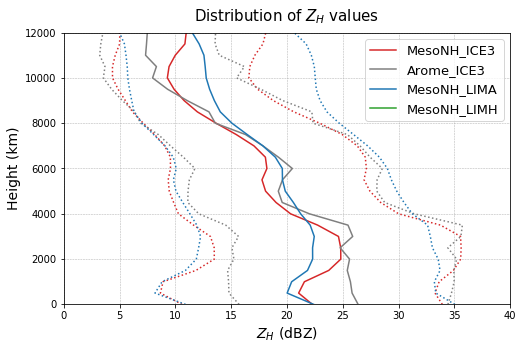

In [60]:
# TOUTES LES SIMULATIONS
fig, ax = plt.subplots(1,1,figsize=(8,5))

altiList = [int(x) for x in np.arange(0,15.5e3,500)]

#plot_CFAD(ax,df,var,'OBS','tab:blue')
plot_CFAD(ax,df,var,'MesoNH_ICE3','tab:red')
plot_CFAD(ax,df,var,'Arome_ICE3','tab:gray')
plot_CFAD(ax,df,var,'MesoNH_LIMA','tab:blue')
plot_CFAD(ax,df,var,'MesoNH_LIMH','tab:green')

ax.legend(loc='upper right',ncol=1,prop={'size':13})

ax.grid(ls='--',lw=0.5)
ax.set_xlim(0,40)
#ax.set_yticks(np.arange(0,16e3,1e3),labels=np.arange(0,16,1),fontsize=13)
#ax.set_xticks(np.arange(20,60,5),labels=np.arange(20,60,5),fontsize=13)
ax.set_ylim(0, 12e3)
ax.set_ylabel('Height (km)',fontsize=14)
ax.set_xlabel(f'{title} ({unit})',fontsize=14)
ax.set_title(f'Distribution of {title} values',fontsize=15,y=1.02)
plt.savefig(data_path+f'/cfad_{var}',bbox_inches='tight',dpi=100)

### Contenus en hydrométéores (uniquement pour les modèles)

In [7]:
altiList = [int(x) for x in np.arange(0,15e3,500)]
fig, axs = plt.subplots(1,2,figsize=(10,6),sharey=True,layout='constrained')

for index,model in enumerate(['ICE3','LIMASG']):
    rr = plot_CFAD(axs[index],df,'rr',model,'tab:green',add_extreme=False,add_Q25_Q75_interval=True)
    ii = plot_CFAD(axs[index],df,'ii',model,'tab:blue',add_extreme=False,add_Q25_Q75_interval=False)
    ss = plot_CFAD(axs[index],df,'ss',model,'tab:red',add_extreme=False,add_Q25_Q75_interval=False)
    gg = plot_CFAD(axs[index],df,'gg',model,'tab:orange',add_extreme=False,add_Q25_Q75_interval=False)
    wg = plot_CFAD(axs[index],df,'wg',model,'tab:purple',add_extreme=False,add_Q25_Q75_interval=True)
    cc = plot_CFAD(axs[index],df,'cc',model,'tab:cyan',add_extreme=False,add_Q25_Q75_interval=False)
    #axs[index].legend(handles=[rr,ii,ss,gg,wg,cc], labels=['rain','ice','snow','graupel','wet graupel','cloud water'])
    axs[index].grid(ls='--',lw=0.5)
    axs[index].set_xlim(0,6)
    #axs[index].set_xscale('log')
    axs[index].set_yticks(np.arange(0,16e3,1e3),labels=np.arange(0,16,1))
    axs[index].set_ylim(0, 15e3)
    axs[0].set_ylabel('Height (km)',fontsize=11)
    axs[index].set_xlabel('Hydrometeor content ($g/m^{3}$)',fontsize=11)
    axs[index].set_title(model)
    h, l = axs[index].get_legend_handles_labels()
legend_hydrometeor(fig,h,l)
fig.suptitle(f'Distribution of hydrometeors content over 10 study cases inside ZDR columns',fontsize=13)
plt.savefig(f'{out_repo_path}statistiques/CFAD_hydrometeor_contents_all_studyCases_zdr_columns',dpi=120, bbox_inches='tight')

NameError: name 'np' is not defined

In [8]:
altiList = [int(x) for x in np.arange(0,15e3,500)]
fig, axs = plt.subplots(1,2,figsize=(10,6),sharey=True,layout='constrained')

for index,model in enumerate(['ICE3','LIMASG']):
    rr = plot_CFAD(axs[index],df,'rr',model,'tab:green',add_extreme=False,add_Q25_Q75_interval=True)
    ii = plot_CFAD(axs[index],df,'ii',model,'tab:blue',add_extreme=False,add_Q25_Q75_interval=False)
    ss = plot_CFAD(axs[index],df,'ss',model,'tab:red',add_extreme=False,add_Q25_Q75_interval=False)
    gg = plot_CFAD(axs[index],df,'gg',model,'tab:orange',add_extreme=False,add_Q25_Q75_interval=False)
    wg = plot_CFAD(axs[index],df,'wg',model,'tab:purple',add_extreme=True,add_Q25_Q75_interval=True)
    cc = plot_CFAD(axs[index],df,'cc',model,'tab:cyan',add_extreme=True,add_Q25_Q75_interval=False)
    #axs[index].legend(handles=[rr,ii,ss,gg,wg,cc], labels=['rain','ice','snow','graupel','wet graupel','cloud water'])
    axs[index].grid(ls='--',lw=0.5)
    axs[index].set_xlim(0,2)
    #axs[index].set_xscale('log')
    axs[index].set_yticks(np.arange(0,16e3,1e3),labels=np.arange(0,16,1))
    axs[index].set_ylim(0, 15e3)
    axs[0].set_ylabel('Height (km)',fontsize=11)
    axs[index].set_xlabel('Hydrometeor content ($g/m^{3}$)',fontsize=11)
    axs[index].set_title(model)
    h, l = axs[index].get_legend_handles_labels()
legend_hydrometeor(fig,h,l)
fig.suptitle(f'Distribution of hydrometeors content over 10 study cases inside storm cells',fontsize=13)
#plt.savefig(f'{out_repo_path}statistiques/CFAD_hydrometeor_contents_all_studyCases_cell_envelop',dpi=150, bbox_inches='tight')

NameError: name 'np' is not defined

In [9]:
altiList = [int(x) for x in np.arange(0,15e3,500)]
fig, axs = plt.subplots(1,2,figsize=(10,6),sharey=True,layout='constrained')

for index,model in enumerate(['ICE3','LIMASG']):
    rr = plot_CFAD(axs[index],df,'rr',model,'tab:green',add_extreme=True,add_Q25_Q75_interval=True)
    ii = plot_CFAD(axs[index],df,'ii',model,'tab:blue',add_extreme=False,add_Q25_Q75_interval=False)
    ss = plot_CFAD(axs[index],df,'ss',model,'tab:red',add_extreme=False,add_Q25_Q75_interval=False)
    gg = plot_CFAD(axs[index],df,'gg',model,'tab:orange',add_extreme=False,add_Q25_Q75_interval=False)
    wg = plot_CFAD(axs[index],df,'wg',model,'tab:purple',add_extreme=True,add_Q25_Q75_interval=True)
    cc = plot_CFAD(axs[index],df,'cc',model,'tab:cyan',add_extreme=True,add_Q25_Q75_interval=False)
    #axs[index].legend(handles=[rr,ii,ss,gg,wg,cc], labels=['rain','ice','snow','graupel','wet graupel','cloud water'])
    axs[index].grid(ls='--',lw=0.5)
    axs[index].set_xlim(0,3.5)
    #axs[index].set_xscale('log')
    axs[index].set_yticks(np.arange(0,16e3,1e3),labels=np.arange(0,16,1))
    axs[index].set_ylim(0, 15e3)
    axs[0].set_ylabel('Height (km)',fontsize=11)
    axs[index].set_xlabel('Hydrometeor content ($g/m^{3}$)',fontsize=11)
    axs[index].set_title(model)
    h, l = axs[index].get_legend_handles_labels()
legend_hydrometeor(fig,h,l)
fig.suptitle(f'Distribution of hydrometeors content over 10 study cases inside storms cores',fontsize=13)
#plt.savefig(f'{out_repo_path}statistiques/CFAD_hydrometeor_contents_all_studyCases_cell_core.png',dpi=150, bbox_inches='tight')

NameError: name 'np' is not defined